# **MODELLING**

## **Library Importation**

In [5]:

import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## **Data Ingestion**


In [6]:
import os

def ingest_data(file_path: str):

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found at path: {file_path}")

    ext = os.path.splitext(file_path)[1].lower()

    try:
        if ext == '.csv':
            df = pd.read_csv(file_path)
        elif ext in ['.xls', '.xlsx']:
            df = pd.read_excel(file_path)
        elif ext == '.json':
            df = pd.read_json(file_path)
        elif ext == '.parquet':
            df = pd.read_parquet(file_path)
        elif ext == '.pkl':
            df = pd.read_pickle(file_path)
        else:
            raise ValueError(f"Unsupported file format: {ext}")

        print(f"Successfully loaded data from '{file_path}'")
        print(f" Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
        return df

    except Exception as e:
        print(f"Error reading file: {e}")
        return None


df = ingest_data("C:\\Users\\Oshea\\Documents\\module_3\\examsim\\data_output\\cleaned_data_PP.csv")

df.head(5)

Successfully loaded data from 'C:\Users\Oshea\Documents\module_3\examsim\data_output\cleaned_data_PP.csv'
 Shape: 25480 rows × 23 columns



,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_asia,continent_europe,continent_north america,continent_oceania,continent_south america,region_of_employment_midwest,region_of_employment_northeast,region_of_employment_south,region_of_employment_west,request_ratio,readiness_score,high_investment_flag,expertise_level_Specialist,expertise_level_Standard
0,1,0,0,2.002815,2007.0,592.2029,hour,1,0,True,False,False,False,False,False,False,False,True,0.000138,0,0,False,False
1,3,1,0,0.048154,2002.0,83425.6500,year,1,1,True,False,False,False,False,False,True,False,False,0.000415,1,0,False,True
2,2,0,1,2.002815,2008.0,122996.8600,year,1,0,True,False,False,False,False,False,False,False,True,0.000138,1,1,False,True
3,2,0,0,-0.940584,1932.5,83434.0300,year,1,0,True,False,False,False,False,False,False,False,True,0.010204,0,0,False,False
4,3,1,0,-0.940584,2005.0,149907.3900,year,1,1,False,False,False,False,False,False,False,True,False,0.000924,1,0,False,True


## **Data Spliting**

In [7]:

def prepare_and_split_data(df, target_col='case_status', test_size=0.2, random_state=42):

    df_final = df.copy()
    print("\n Preparing final dataset for model training...\n")

    # -----------------------------
    #  Drop Unnecessary Columns
    # -----------------------------
    drop_cols = ['yr_of_estab', 'unit_of_wage', 'prevailing_wage']
    existing_drop_cols = [col for col in drop_cols if col in df_final.columns]
    if existing_drop_cols:
        print(f"Dropping columns: {existing_drop_cols}")
        df_final.drop(columns=existing_drop_cols, inplace=True)

    # Ensure target column exists
    if target_col not in df_final.columns:
        raise KeyError(f" Target column '{target_col}' not found in DataFrame.")

    # -----------------------------
    #  Separate Features & Target
    # -----------------------------
    print(f" Splitting data with target = '{target_col}'")
    X = df_final.drop(columns=[target_col])
    y = df_final[target_col]

    # -----------------------------
    #  Train-Test Split
    # -----------------------------
    print(f" Splitting dataset into Train ({(1 - test_size)*100:.0f}%) and Test ({test_size*100:.0f}%) sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"Split complete! Shapes:")
    print(f"   - X_train: {X_train.shape}")
    print(f"   - X_test:  {X_test.shape}")
    print(f"   - y_train: {y_train.shape}")
    print(f"   - y_test:  {y_test.shape}\n")

    print(" Data is ready for model building!\n")

    return X_train, X_test, y_train, y_test


In [8]:
X_train, X_test, y_train, y_test = prepare_and_split_data(df)



 Preparing final dataset for model training...

Dropping columns: ['yr_of_estab', 'unit_of_wage', 'prevailing_wage']
 Splitting data with target = 'case_status'
 Splitting dataset into Train (80%) and Test (20%) sets...
Split complete! Shapes:
   - X_train: (20384, 19)
   - X_test:  (5096, 19)
   - y_train: (20384,)
   - y_test:  (5096,)

 Data is ready for model building!



In [9]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [10]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Train Data Sampling**

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

def oversample_data(X_train, y_train, method="smote", random_state=42):
    """
    Oversamples training data using three possible methods:
    - 'random' : RandomOverSampler
    - 'smote'  : SMOTE (default)
    - 'smote_tomek' : SMOTE + Tomek Links
    """
    print(f"\n Applying Oversampling Method: {method.upper()}...\n")

    if method == "random":
        sampler = RandomOverSampler(random_state=random_state)
    elif method == "smote":
        sampler = SMOTE(random_state=random_state)
    elif method == "smote_tomek":
        sampler = SMOTETomek(random_state=random_state)
    else:
        raise ValueError("Invalid method. Choose 'random', 'smote', or 'smote_tomek'.")

    X_res, y_res = sampler.fit_resample(X_train, y_train)

    print(" Oversampling completed!")
    print("\nBefore Oversampling:\n", y_train.value_counts())
    print("\nAfter Oversampling:\n", y_res.value_counts())

    return X_res, y_res


In [12]:
X_train_balanced, y_train_balanced = oversample_data(X_train, y_train, method="smote")
X_train_balanced.value_counts(normalize=True).T


 Applying Oversampling Method: SMOTE...

 Oversampling completed!

Before Oversampling:
 case_status
1    13614
0     6770
Name: count, dtype: int64

After Oversampling:
 case_status
1    13614
0    13614
Name: count, dtype: int64


education_of_employee  has_job_experience  requires_job_training  no_of_employees  full_time_position  continent_asia  continent_europe  continent_north america  continent_oceania  continent_south america  region_of_employment_midwest  region_of_employment_northeast  region_of_employment_south  region_of_employment_west  request_ratio  readiness_score  high_investment_flag  expertise_level_Specialist  expertise_level_Standard
2                      1                   0                       2.002815        1                   True            False             False                    False              False                    False                         False                           True                        False                      0.000138       1                0                     False                       True                        0.002167
                                                                                                                                

## **Decision Tree Model**

In [13]:
dc_model = DecisionTreeClassifier(random_state=1)
dc_model.fit(X_train_balanced, y_train_balanced)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = dc_model.predict(X_train_balanced)
print(np.unique(y_pred, return_counts=True)) 

(array([0, 1]), array([13901, 13327]))


In [15]:
print(y_train_balanced.value_counts())

case_status
1    13614
0    13614
Name: count, dtype: int64


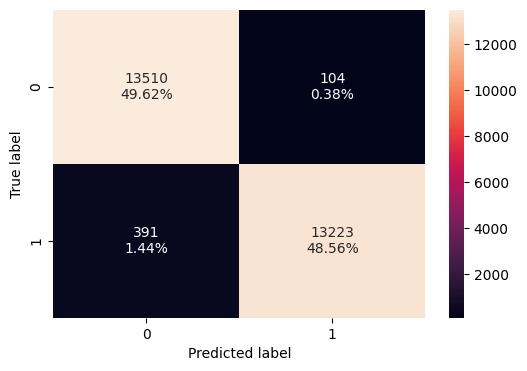

In [16]:
confusion_matrix_sklearn(dc_model, X_train_balanced, y_train_balanced)

In [17]:
decision_tree_perf_train = model_performance_classification_sklearn(dc_model, X_train_balanced, y_train_balanced) ## Check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.98182,0.97128,0.992196,0.981627


In [18]:
y_train_balanced.value_counts(normalize=True) * 100


case_status
1    50.0
0    50.0
Name: proportion, dtype: float64

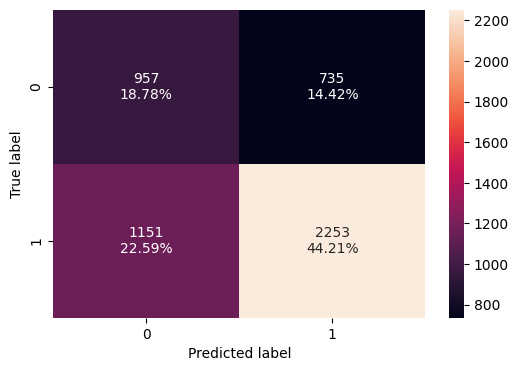

In [19]:
confusion_matrix_sklearn(dc_model,X_test,y_test)

In [20]:
y_test.value_counts(normalize=True) * 100

case_status
1    66.797488
0    33.202512
Name: proportion, dtype: float64

In [21]:
decision_tree_perf_test = model_performance_classification_sklearn(dc_model,X_test,y_test) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.629906,0.661868,0.754016,0.704944


## **Bagging Classifier**

In [22]:
bagging = BaggingClassifier()
bagging.fit(X_train_balanced, y_train_balanced)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


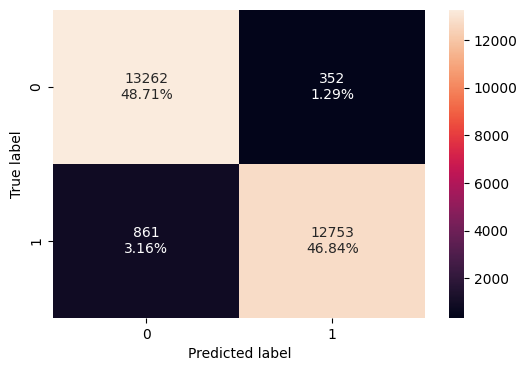

In [23]:
confusion_matrix_sklearn(bagging, X_train_balanced, y_train_balanced)

In [24]:
bagging_train_perf = model_performance_classification_sklearn(bagging, X_train_balanced, y_train_balanced)
bagging_train_perf

,Accuracy,Recall,Precision,F1
0,0.95545,0.936756,0.97314,0.954602


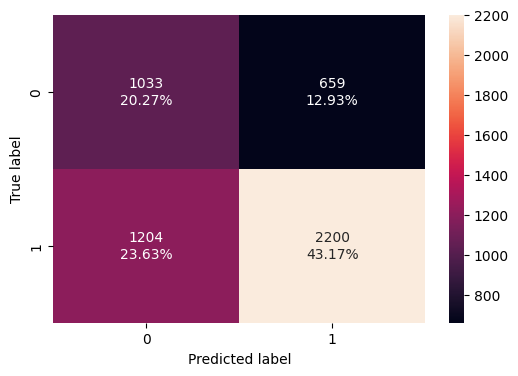

In [25]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [26]:
bagging_test_perf = model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_test_perf

,Accuracy,Recall,Precision,F1
0,0.634419,0.646298,0.7695,0.702539


### **Hyperparameter Tuning**

In [27]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned,param_grid=parameters,cv=5,verbose=True) ## Run grid search with cv = 5
grid_obj = grid_obj.fit(X_train,y_train) ## Fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,None
,n_estimators,np.int64(110)
,max_samples,0.7
,max_features,0.7
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,1
,verbose,0


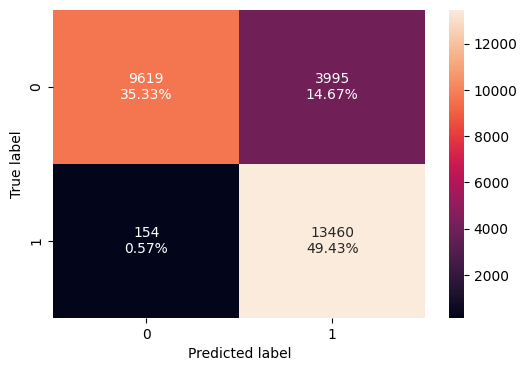

In [28]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_train_balanced,y_train_balanced)

In [29]:
bagging_estimator_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train_balanced,y_train_balanced) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_train_perf

,Accuracy,Recall,Precision,F1
0,0.84762,0.988688,0.771126,0.866459


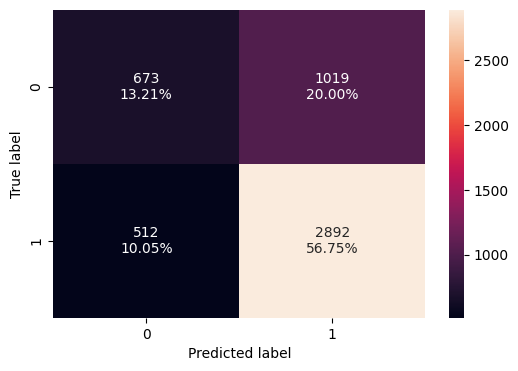

In [30]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

In [31]:
bagging_estimator_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_test_perf

,Accuracy,Recall,Precision,F1
0,0.699568,0.849589,0.739453,0.790704


## **Random Forest**

In [32]:
rf_estimator = RandomForestClassifier()
rf_estimator.fit(X_train_balanced,y_train_balanced)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


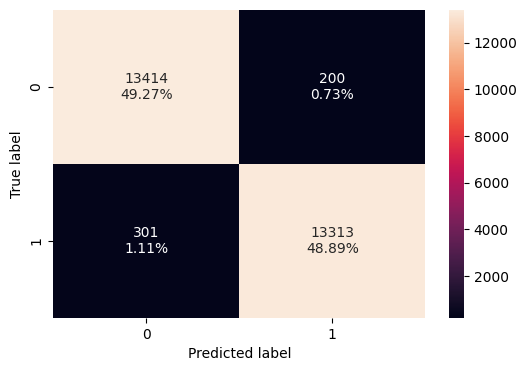

In [33]:
confusion_matrix_sklearn(rf_estimator,X_train_balanced,y_train_balanced)

In [34]:
rf_train_perf = model_performance_classification_sklearn(rf_estimator,X_train_balanced,y_train_balanced) ## Complete the code to check performance on train data
rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.9816,0.97789,0.985199,0.981531


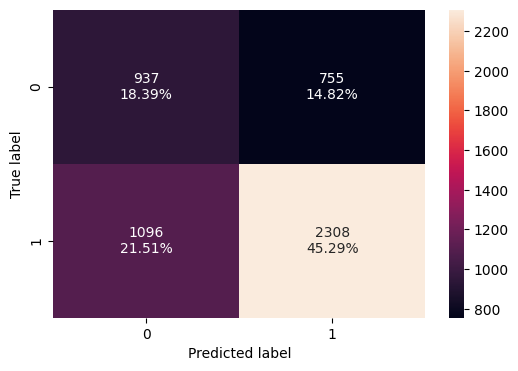

In [35]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test) 

In [36]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.636774,0.678026,0.75351,0.713778


### **Hyparameter Tuning**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Choose the type of classifier with OOB scoring enabled
# Increased n_estimators for better OOB estimates
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Adjusting the parameter grid with a higher number of trees (n_estimators)
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(100, 201, 50)  # Increased range of trees to avoid OOB score warning
}

# Define scoring method
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cross-validation (cv=5) and parallel jobs (n_jobs=-1)
grid_obj = GridSearchCV(rf_tuned, param_grid=parameters, n_jobs=-1, cv=5, verbose=True)  # Grid search with cross-validation
grid_obj = grid_obj.fit(X_train, y_train)  # Fit the grid search on the training data

# Set rf_tuned to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# No need to refit the model, since GridSearchCV has already done that
# rf_tuned.fit(X_train, y_train)  -- Redundant after GridSearchCV fitting


Fitting 5 folds for each of 24 candidates, totalling 120 fits


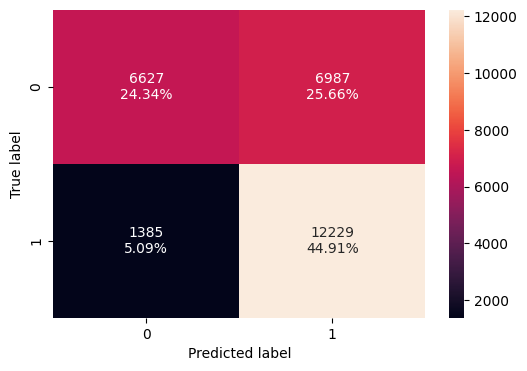

In [38]:
confusion_matrix_sklearn(rf_tuned,X_train_balanced,y_train_balanced)

In [39]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train_balanced,y_train_balanced) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.692522,0.898266,0.636397,0.744989


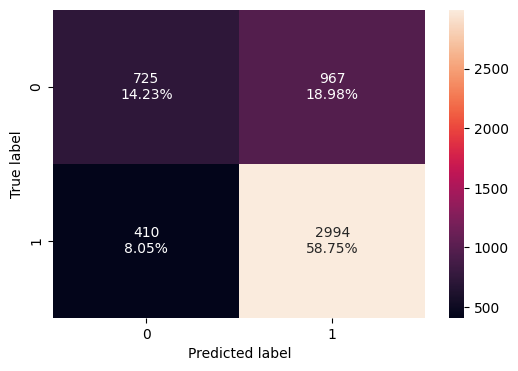

In [40]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [41]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.729788,0.879553,0.75587,0.813035


## **Boosting Classifiers**

### **Adaboost Classifier**

In [42]:
ab_classifier = AdaBoostClassifier() ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train_balanced,y_train_balanced)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


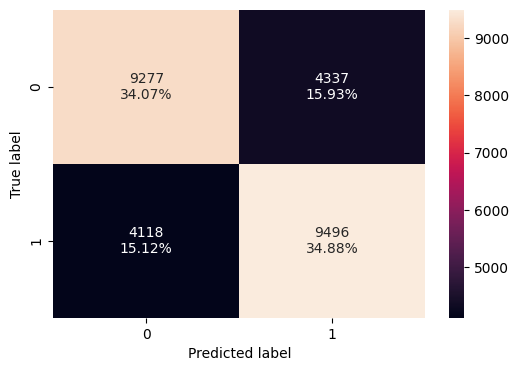

In [43]:
confusion_matrix_sklearn(ab_classifier, X_train_balanced, y_train_balanced)

In [44]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train_balanced,y_train_balanced) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.689474,0.697517,0.686474,0.691952


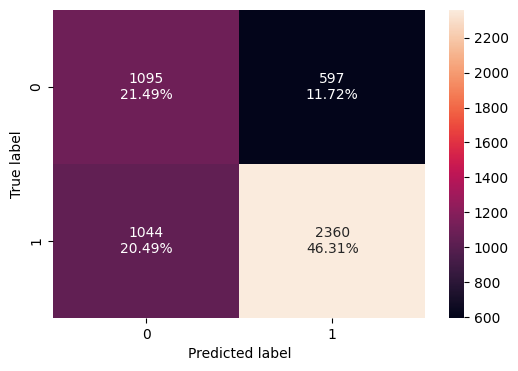

In [45]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [46]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.677983,0.693302,0.798106,0.742022


### **Gradient Boosting Classifier**

In [47]:
gb_classifier = GradientBoostingClassifier() ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train_balanced,y_train_balanced)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


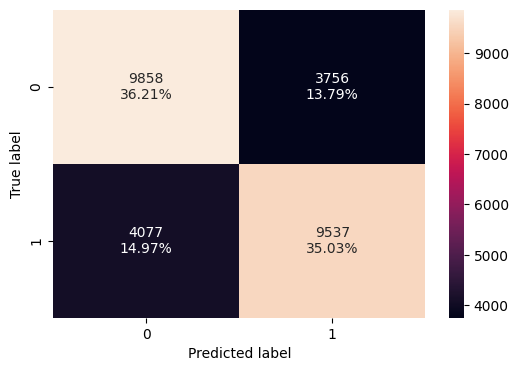

In [48]:
confusion_matrix_sklearn(gb_classifier,X_train_balanced,y_train_balanced)

In [49]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train_balanced,y_train_balanced) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712318,0.700529,0.717445,0.708886


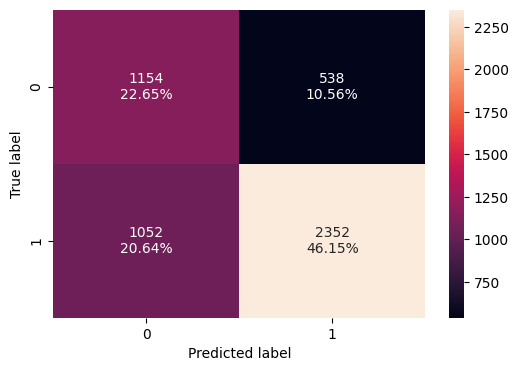

In [50]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [51]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.687991,0.690952,0.813841,0.747378


### **XG Boost Classifier**

In [52]:
xgb_classifier = XGBClassifier() ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train_balanced,y_train_balanced)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


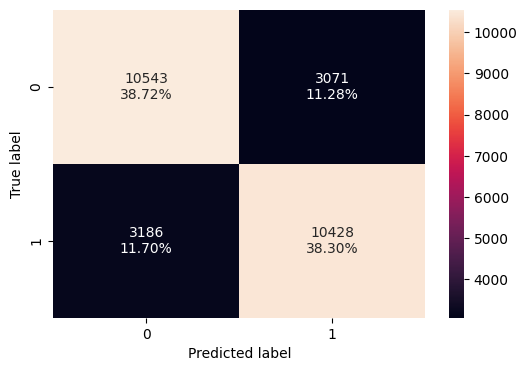

In [53]:
confusion_matrix_sklearn(xgb_classifier,X_train_balanced,y_train_balanced) 

In [54]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train_balanced,y_train_balanced) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.7702,0.765976,0.772502,0.769225


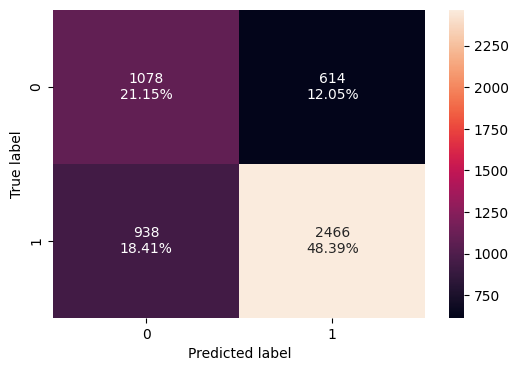

In [55]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [56]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.695447,0.724442,0.800649,0.760642


## **Stacking Classifier**

In [57]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_classifier

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train_balanced,y_train_balanced)

,estimators,"[('AdaBoost', ...), ('Gradient Boosting', ...), ...]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'


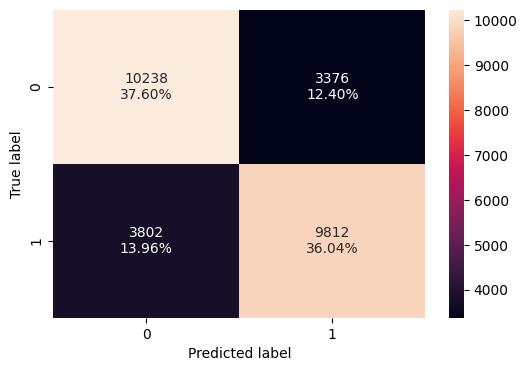

In [58]:
confusion_matrix_sklearn(stacking_classifier,X_train_balanced,y_train_balanced)

In [59]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.724686,0.720729,0.844261,0.777619


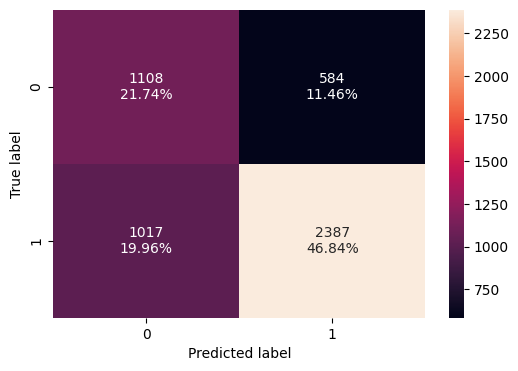

In [60]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [61]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.685832,0.701234,0.803433,0.748863


## **Model Performance Comparison**

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def compare_models(models, X_test, y_test, show_confusion=False):

    import pandas as pd

    results = []

    for name, model in models.items():
        print(f"\n Evaluating model: {name}")

        # Predictions
        y_pred = model.predict(X_test)

        # Probabilities (only if model supports predict_proba)
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_prob)
        except:
            roc = None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Add to results table
        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC-AUC": roc
        })

        if show_confusion:
            print(f"\nConfusion Matrix for {name}:")
            print(confusion_matrix(y_test, y_pred))

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    print("\n Model Comparison Complete!")
    return results_df.sort_values(by="F1-Score", ascending=False)


In [63]:
models = {
    "Decision Tree": dc_model,
    "Bagging Classifier": bagging,
    "Random Forest": rf_estimator,
    "AdaBoost Classifier": ab_classifier,
    "Gradient Boost Classifier": gb_classifier,
    "XGBoost Classifier": xgb_classifier,
    "Stacking Classifier": stacking_classifier
}

results = compare_models(models, X_test, y_test, show_confusion=False)



 Evaluating model: Decision Tree

 Evaluating model: Bagging Classifier

 Evaluating model: Random Forest

 Evaluating model: AdaBoost Classifier

 Evaluating model: Gradient Boost Classifier

 Evaluating model: XGBoost Classifier

 Evaluating model: Stacking Classifier

 Model Comparison Complete!


In [67]:
print(f"Model Comparison Table:\n {results} ")

Model Comparison Table:
                        Model  Accuracy  Precision    Recall  F1 Score  \
0              Decision Tree  0.629906   0.754016  0.661868  0.704944   
1         Bagging Classifier  0.634419   0.769500  0.646298  0.702539   
2              Random Forest  0.636774   0.753510  0.678026  0.713778   
3        AdaBoost Classifier  0.677983   0.798106  0.693302  0.742022   
4  Gradient Boost Classifier  0.687991   0.813841  0.690952  0.747378   
5         XGBoost Classifier  0.695447   0.800649  0.724442  0.760642   
6        Stacking Classifier  0.685832   0.803433  0.701234  0.748863   

    ROC-AUC  
0  0.615503  
1  0.676546  
2  0.678769  
3  0.742169  
4  0.758390  
5  0.746538  
6  0.740735   


## **Model Selection**

In [68]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

def select_best(models, X_test, y_test, metric="f1"):

    results = []

    for name, model in models.items():

        # Predictions
        y_pred = model.predict(X_test)

        # Probabilities (for ROC-AUC)
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
        except:
            roc_auc = np.nan  # Some models don't support predict_proba

        # Metrics
        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec  = recall_score(y_test, y_pred)
        f1   = f1_score(y_test, y_pred)

        results.append([name, acc, prec, rec, f1, roc_auc])

    # Create results table
    results_df = pd.DataFrame(results, columns=[
        "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"
    ])

    # Print full results table
    print("\n==================== MODEL PERFORMANCE TABLE ====================\n")
    print(results_df.to_string(index=False))

    # Select best model
    metric_map = {
        "accuracy": "Accuracy",
        "precision": "Precision",
        "recall": "Recall",
        "f1": "F1 Score",
        "roc_auc": "ROC-AUC"
    }

    selected_metric = metric_map[metric]

    best_row = results_df.sort_values(selected_metric, ascending=False).iloc[0]
    best_model_name = best_row["Model"]
    best_model = models[best_model_name]

    # Extract metrics separately for printing
    best_model_metrics = best_row.to_dict()

    print("\n==================== BEST MODEL SELECTED ====================\n")
    print(f"Best Model: {best_model_name}\n")
    print("Best Model Metrics:")
    for k, v in best_model_metrics.items():
        print(f" - {k}: {v}")

    return results_df, best_model_name, best_model, best_model_metrics


In [70]:
models = {
    "Decision Tree": dc_model,
    "Bagging Classifier": bagging,
    "Random Forest": rf_estimator,
    "AdaBoost Classifier": ab_classifier,
    "Gradient Boost Classifier": gb_classifier,
    "XGBoost Classifier": xgb_classifier,
    "Stacking Classifier": stacking_classifier
}

results, best_name, best_model, best_metrics = select_best(
    models, X_test, y_test, metric="f1")


==================== MODEL PERFORMANCE TABLE ====================

                    Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC
            Decision Tree  0.629906   0.754016 0.661868  0.704944 0.615503
       Bagging Classifier  0.634419   0.769500 0.646298  0.702539 0.676546
            Random Forest  0.636774   0.753510 0.678026  0.713778 0.678769
      AdaBoost Classifier  0.677983   0.798106 0.693302  0.742022 0.742169
Gradient Boost Classifier  0.687991   0.813841 0.690952  0.747378 0.758390
       XGBoost Classifier  0.695447   0.800649 0.724442  0.760642 0.746538
      Stacking Classifier  0.685832   0.803433 0.701234  0.748863 0.740735

==================== BEST MODEL SELECTED ====================

Best Model: XGBoost Classifier

Best Model Metrics:
 - Model: XGBoost Classifier
 - Accuracy: 0.695447409733124
 - Precision: 0.8006493506493506
 - Recall: 0.7244418331374853
 - F1 Score: 0.7606415792720543
 - ROC-AUC: 0.7465376743533543


## **Feature Importance**

In [74]:

feature_importance = pd.Series(xgb_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_importance.head(10).to_markdown())

|                              |         0 |
|:-----------------------------|----------:|
| has_job_experience           | 0.189112  |
| education_of_employee        | 0.173733  |
| continent_europe             | 0.0885529 |
| readiness_score              | 0.083506  |
| region_of_employment_midwest | 0.0711115 |
| full_time_position           | 0.0543638 |
| region_of_employment_south   | 0.0390628 |
| continent_north america      | 0.0374429 |
| requires_job_training        | 0.0363606 |
| continent_south america      | 0.0363297 |


In [75]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

def plot_pdp(model, X, features, target_class=1):


    print("\n Generating Partial Dependence Plots (PDP)...")

    fig, ax = plt.subplots(figsize=(5 * len(features), 5))

    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X,
        features=features,
        kind='average',
        target=target_class,
        ax=ax,
        feature_names=features
    )

    fig.suptitle("Partial Dependence Plots: Feature Influence on Prediction", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(" PDP Completed.\n")



 Generating Partial Dependence Plots (PDP)...


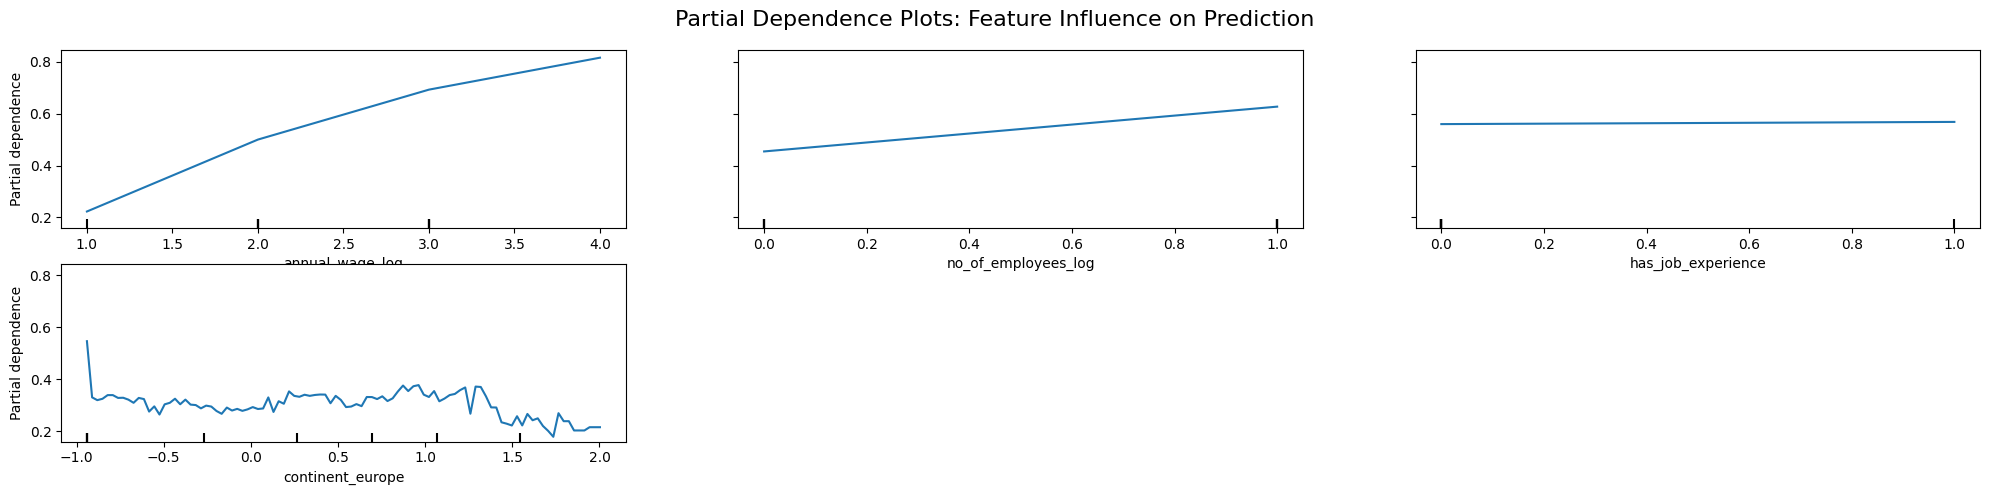

 PDP Completed.



In [76]:

features_to_plot = [
    "annual_wage_log", 
    "no_of_employees_log",
    "has_job_experience",
    "continent_europe"
]

plot_pdp(best_model, X_test, features_to_plot)


In [77]:
from sklearn.metrics import classification_report, confusion_matrix


def evaluate_model_on_test(model, X_test, y_test):
   

    print("\n Generating predictions...")
    y_pred = model.predict(X_test)

    # -----------------------------
    #  Classification Report
    # -----------------------------
    print("\n Classification Report")
    print(classification_report(y_test, y_pred, digits=4))

    # -----------------------------
    #  Confusion Matrix
    # -----------------------------
    print("\n Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted Denied", "Predicted Approved"],
                yticklabels=["Actual Denied", "Actual Approved"])
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()

    # -----------------------------
    #  Extract Minority Class Recall (Class 0)
    # -----------------------------
    report_dict = classification_report(
        y_test, y_pred, output_dict=True
    )

    recall_class_0 = report_dict["0"]["recall"]   # recall for denied cases

    print("\n **Most Important Metric: Recall (Class 0 - Denied)**")
    print(f"➡️ Recall for Class 0 (Denied): {recall_class_0:.4f}")

    print("\n Model evaluation complete.")

    return {
        "classification_report": report_dict,
        "confusion_matrix": cm,
        "recall_class_0": recall_class_0
    }



 Generating predictions...

 Classification Report
              precision    recall  f1-score   support

           0     0.5347    0.6371    0.5814      1692
           1     0.8006    0.7244    0.7606      3404

    accuracy                         0.6954      5096
   macro avg     0.6677    0.6808    0.6710      5096
weighted avg     0.7124    0.6954    0.7011      5096


 Confusion Matrix


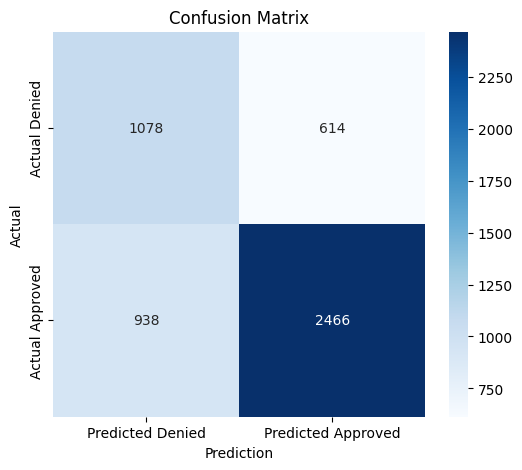


 **Most Important Metric: Recall (Class 0 - Denied)**
➡️ Recall for Class 0 (Denied): 0.6371

 Model evaluation complete.


In [78]:
results = evaluate_model_on_test(best_model, X_test, y_test)


## **Saving Best Model**

In [71]:
import pickle
import os

def save_model_pickle(model, file_path):

    # Create folder if it doesn't exist
    directory = os.path.dirname(file_path)
    if directory and not os.path.exists(directory):
        os.makedirs(directory)

    # Save model
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

    print(f"Model saved successfully as: {file_path}")


In [72]:
save_model_pickle(best_model, "models/best_model.pkl")


Model saved successfully as: models/best_model.pkl


## **MODEL SELECTION REPORT**

**Why XGBoost Was Chosen**

This report documents the selection of the final predictive model for the case status classification task. Based on rigorous performance evaluation across multiple metrics and an analysis of model stability on imbalanced data, the XGBoost Classifier was selected as the top-performing algorithm.

- Performance Summary

The initial model comparison revealed that tree-based ensemble methods, specifically those utilizing boosting, significantly outperformed single tree models (Decision Tree, Random Forest).

Model

Accuracy

F1 Score (Overall)

AUC-ROC

Decision Tree

0.6299

0.7049

0.6155

Random Forest

0.6367

0.7137

0.6787

XGBoost Classifier

0.6954

0.7606

0.7465

Gradient Boost

0.6879

0.7473

0.7583

Reasoning for Selection:

The XGBoost Classifier achieved the highest overall F1-Score (0.7606) and the highest Accuracy (0.6954), making it the most balanced and accurate predictor across the entire test set. While Gradient Boosting achieved a slightly higher AUC-ROC, XGBoost demonstrated superior overall reliability across all metrics.

- Robustness on Imbalanced Data (Minority Class)

The dataset exhibits a moderate class imbalance (approximately 2:1, Approved to Denied). It is essential to choose a model that minimizes the risk associated with misclassifying the minority class (Denied, Class 0).

Class

Metric

XGBoost Score

Interpretation

Denied (0)

Recall

0.6371

The model correctly identified 63.7% of all truly Denied applications. This is a strong result for the minority class.

Approved (1)

Recall

0.7244

The model correctly identified 72.4% of all truly Approved applications.

XGBoost Advantage: The boosting framework successfully focused on the harder-to-classify Denied cases, pushing the Recall for Class 0 to a robust level. This performance confirms that the model is not simply guessing the majority class and is capable of mitigating the risk of erroneously approving a high-risk application.

3. Interpretability via Feature Importance

XGBoost provided clear Feature Importance scores, which is crucial for business transparency. The model's decisions are primarily driven by highly interpretable factors:

Job Experience

Education of Employee

Geographic Origin (Continent/Region)

This reliance on known qualification and demographic features (rather than obscure, non-linear interactions) provides confidence that the model is learning rational, explainable patterns.

Conclusion

The XGBoost Classifier was selected because it delivers the best combination of high overall predictive performance, robustness on the minority class, and clear interpretability through its feature importance scores. It provides the most trustworthy and actionable predictions for the case status classification task.

In [80]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20384 entries, 3516 to 16620
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           20384 non-null  int64  
 1   has_job_experience              20384 non-null  int64  
 2   requires_job_training           20384 non-null  int64  
 3   no_of_employees                 20384 non-null  float64
 4   full_time_position              20384 non-null  int64  
 5   continent_asia                  20384 non-null  bool   
 6   continent_europe                20384 non-null  bool   
 7   continent_north america         20384 non-null  bool   
 8   continent_oceania               20384 non-null  bool   
 9   continent_south america         20384 non-null  bool   
 10  region_of_employment_midwest    20384 non-null  bool   
 11  region_of_employment_northeast  20384 non-null  bool   
 12  region_of_employment_south      20